# Classification

In [1]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load dataset and preprocessing

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()


iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
Data_iris = iris.data

Data_iris = pd.DataFrame(Data_iris, columns = iris.feature_names)

In [4]:
Data_iris['label'] = iris.target

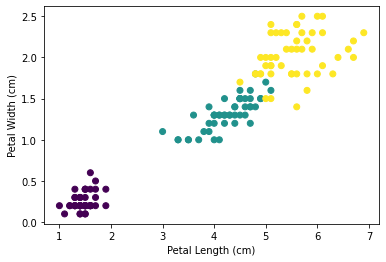

In [5]:
plt.scatter(Data_iris.iloc[:,2], Data_iris.iloc[:,3], c = iris.target )
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [6]:
x = Data_iris.iloc[:,0:4]
y = Data_iris.iloc[:,4]

# k-NN Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 1)

kNN.fit(x,y)

KNeighborsClassifier(n_neighbors=6, p=1)

In [8]:
x_N = np.array([[5.6,3.4,1.4,0.1]])

kNN.predict(x_N)


array([0])

In [9]:
x_N2 = np.array([[7.5,4,5.5,2]])

kNN.predict(x_N2)

array([2])

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1)

kNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50, p=1)

In [12]:
predicted_types = kNN.predict(X_test)


In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted_types)


0.8333333333333334

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [15]:
Dt = DecisionTreeClassifier()

Dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [16]:
Predicted_types_Dt = Dt.predict(X_test)

accuracy_score(y_test, Predicted_types_Dt)

0.9666666666666667

In [17]:
from sklearn.model_selection import cross_val_score

Scores_Dt = cross_val_score(Dt, x, y, cv = 10)

# Naive Bayes Classifier

In [18]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()


In [19]:
NB.fit(X_train,y_train)

Predicted_types_NB = NB.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,Predicted_types_NB)


0.9666666666666667

In [21]:
from sklearn.model_selection import cross_val_score

Scores_NB = cross_val_score(NB, x, y, cv = 10)


# Logistic Regression

In [22]:
from sklearn.datasets import load_breast_cancer

Data_C = load_breast_cancer()

x = Data_C.data
y = Data_C.target

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=42)

In [24]:
 from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()



In [25]:
Lr.fit(X_train,y_train)

predicted_classes_Lr = Lr.predict(X_test)


C:\Users\CDR Lab\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluation Metrics

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

Conf_Mat = confusion_matrix(y_test,predicted_classes_Lr)

Class_rep = classification_report(y_test,predicted_classes_Lr)

In [27]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [28]:
y_prob = Lr.predict_proba(X_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

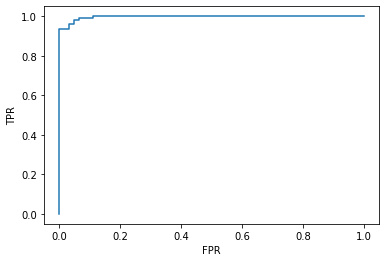

In [29]:
plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_prob)



0.9966196355085244